# Code Written by:
**Shweta Tiwari**
*20 Oct 2023*

## Algorithm:  K Clique

In [1]:
import time

In [2]:
from itertools import combinations
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# Algorithm

In [3]:
%%time
def k_cliques(graph):
    # 2-cliques
    cliques = [{i, j} for i, j in graph.edges() if i != j]
    k = 2

    while cliques:
        # result
        yield k, cliques

        # merge k-cliques into (k+1)-cliques
        cliques_1 = set()
        for u, v in combinations(cliques, 2):
            w = u ^ v
            if len(w) == 2 and graph.has_edge(*w):
                cliques_1.add(tuple(u | w))

        # remove duplicates
        cliques = list(map(set, cliques_1))
        k += 1

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10 µs


In [4]:
%%time
def print_cliques(graph):
    for k, cliques in k_cliques(graph):
        print('%d-cliques: #%d, %s ...' % (k, len(cliques), cliques[:3]))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


# Run

## Graph #1

In [5]:
%%time
nodes = 6
graph = nx.Graph()
graph.add_nodes_from(range(nodes))
graph.add_edges_from(combinations(range(nodes), 2))

CPU times: user 120 µs, sys: 0 ns, total: 120 µs
Wall time: 125 µs


CPU times: user 51 ms, sys: 979 µs, total: 51.9 ms
Wall time: 63.1 ms


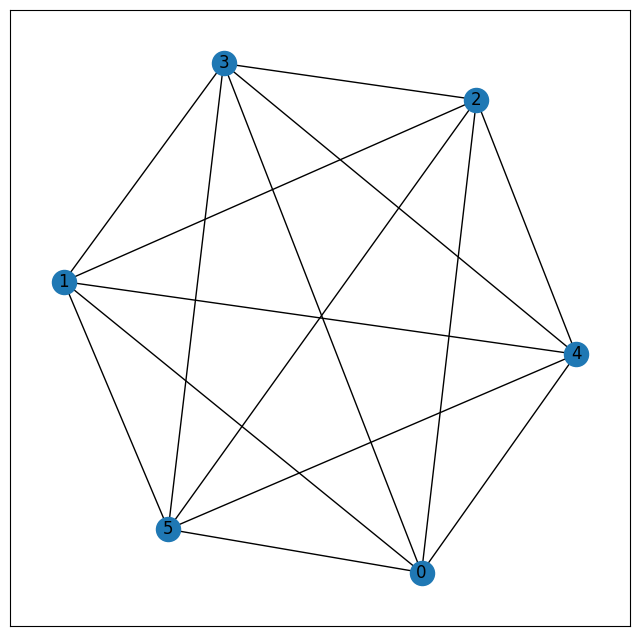

In [6]:
%%time
plt.figure(figsize=(8, 8))
nx.draw_networkx(graph)

In [7]:
%%time
print_cliques(graph)

2-cliques: #15, [{0, 1}, {0, 2}, {0, 3}] ...
3-cliques: #20, [{0, 1, 3}, {1, 2, 5}, {1, 4, 5}] ...
4-cliques: #15, [{0, 1, 3, 4}, {0, 1, 4, 5}, {1, 3, 4, 5}] ...
5-cliques: #6, [{0, 1, 3, 4, 5}, {0, 1, 2, 3, 5}, {0, 1, 2, 4, 5}] ...
6-cliques: #1, [{0, 1, 2, 3, 4, 5}] ...
CPU times: user 869 µs, sys: 0 ns, total: 869 µs
Wall time: 877 µs


## Graph #2

In [8]:
%%time
nodes, edges = 10, 50
graph = nx.Graph()
graph.add_nodes_from(range(nodes))
graph.add_edges_from(np.random.randint(0, nodes, (edges, 2)))

CPU times: user 548 µs, sys: 0 ns, total: 548 µs
Wall time: 2.39 ms


CPU times: user 51 ms, sys: 9.92 ms, total: 61 ms
Wall time: 52.8 ms


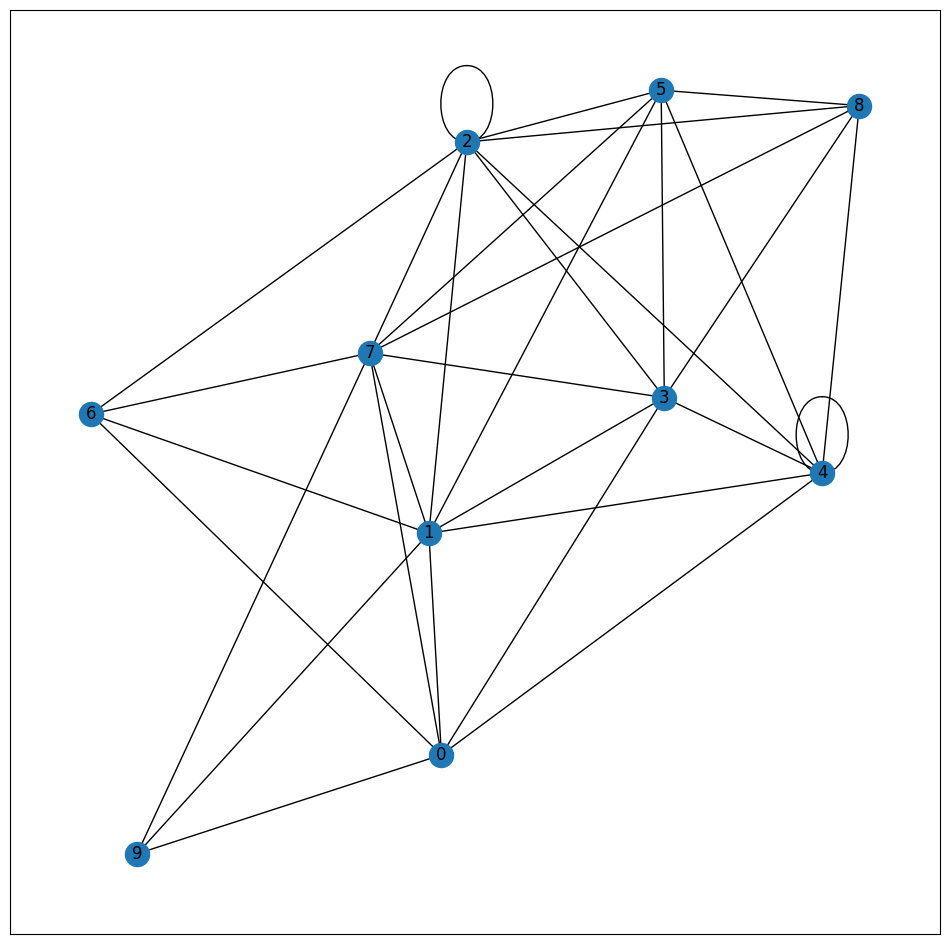

In [9]:
%%time
plt.figure(figsize=(12, 12))
nx.draw_networkx(graph)

In [10]:
%%time
print_cliques(graph)

2-cliques: #30, [{0, 3}, {0, 1}, {0, 4}] ...
3-cliques: #39, [{1, 5, 7}, {0, 1, 3}, {0, 1, 6}] ...
4-cliques: #21, [{0, 1, 3, 4}, {8, 2, 3, 7}, {0, 1, 3, 7}] ...
5-cliques: #4, [{1, 2, 3, 5, 7}, {2, 3, 4, 5, 8}, {1, 2, 3, 4, 5}] ...
CPU times: user 2.05 ms, sys: 14 µs, total: 2.06 ms
Wall time: 2.07 ms


## Graph #3

In [11]:
%%time
nodes, edges = 100, 1000
graph = nx.Graph()
graph.add_nodes_from(range(nodes))
graph.add_edges_from(np.random.randint(0, nodes, (edges, 2)))

CPU times: user 4.7 ms, sys: 0 ns, total: 4.7 ms
Wall time: 4.72 ms


CPU times: user 132 ms, sys: 44.4 ms, total: 177 ms
Wall time: 145 ms


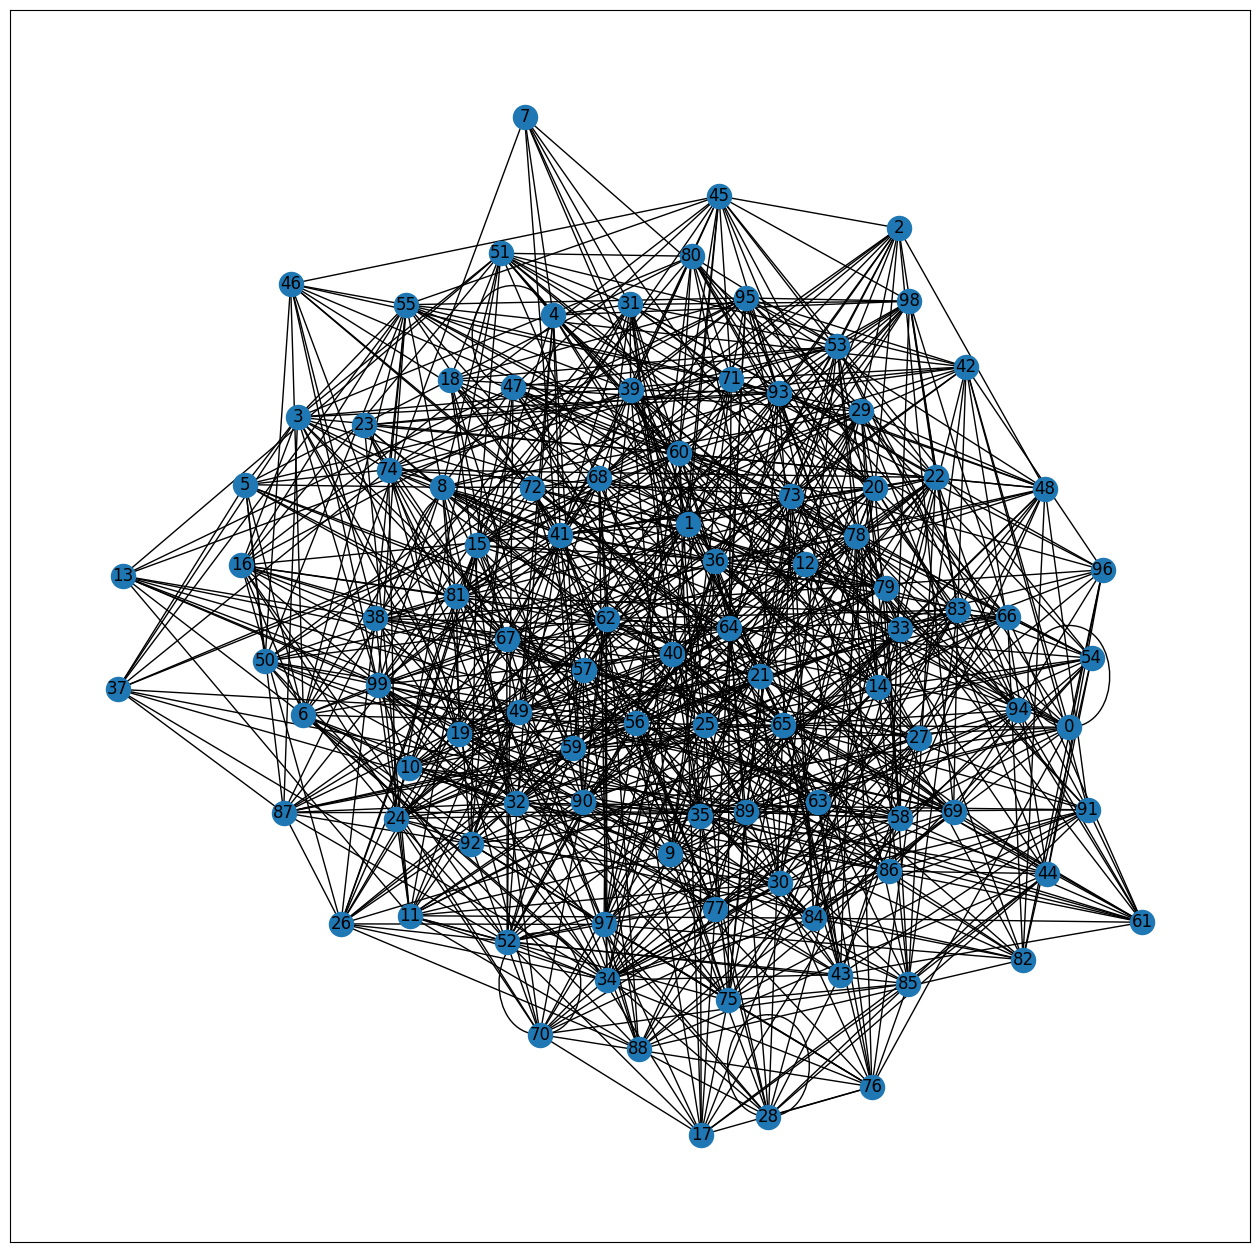

In [12]:
%%time
plt.figure(figsize=(16, 16))
nx.draw_networkx(graph)

In [13]:
%%time
print_cliques(graph)

2-cliques: #892, [{0, 77}, {0, 78}, {0, 84}] ...
3-cliques: #1066, [{99, 6, 55}, {85, 93, 14}, {40, 25, 89}] ...
4-cliques: #213, [{42, 93, 95, 55}, {59, 20, 61, 84}, {78, 36, 53, 30}] ...
5-cliques: #5, [{34, 99, 6, 40, 77}, {97, 75, 76, 49, 92}, {97, 75, 76, 49, 92}] ...
CPU times: user 546 ms, sys: 758 µs, total: 546 ms
Wall time: 569 ms


# The End